# Lab 4 - analysis of Bitcoin market price and volume of tweets about Bitcoin.

In [1]:
# !pip3 install sklearn

In [2]:
import pandas as pd
import numpy as np
import string
import statistics as stat
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

plt.style.use('seaborn-whitegrid')

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (25, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### 1. Import dataset
https://www.kaggle.com/jaimebadiola/bitcoin-tweets-and-price?select=df_Final.csv

In [3]:
df = pd.read_csv('btc.csv', sep=';')

In [4]:
df.head()

,Date,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots,Open,High,Low,Close,Volume (BTC),Volume (Currency)
0,2017-08-01 00:00:00,0.082893,1027.0,139.0,347.0,397.0,-0.516620,0.417882,695.0,144.0,2855.81,2863.06,2823.00,2825.92,184.02,"522951,00"
1,2017-08-01 01:00:00,0.053160,778.0,111.0,193.0,320.0,-0.423402,0.415385,493.0,154.0,2823.01,2860.02,2821.01,2853.38,77.3,219605.16
2,2017-08-01 02:00:00,0.124251,836.0,89.0,273.0,264.0,-0.440938,0.428661,510.0,210.0,2846.27,2858.04,2837.31,2841.60,135.83,386739.15
3,2017-08-01 03:00:00,-0.021036,984.0,250.0,236.0,314.0,-0.441173,0.396034,683.0,184.0,2841.84,2863.88,2837.73,2862.93,143.2,408360.03
4,2017-08-01 04:00:00,0.055437,751.0,114.0,195.0,305.0,-0.414978,0.417159,517.0,137.0,2862.92,2876.00,2848.11,2874.99,222.53,637045.88


### 2. Motivation
- 

### 3. Visualize data

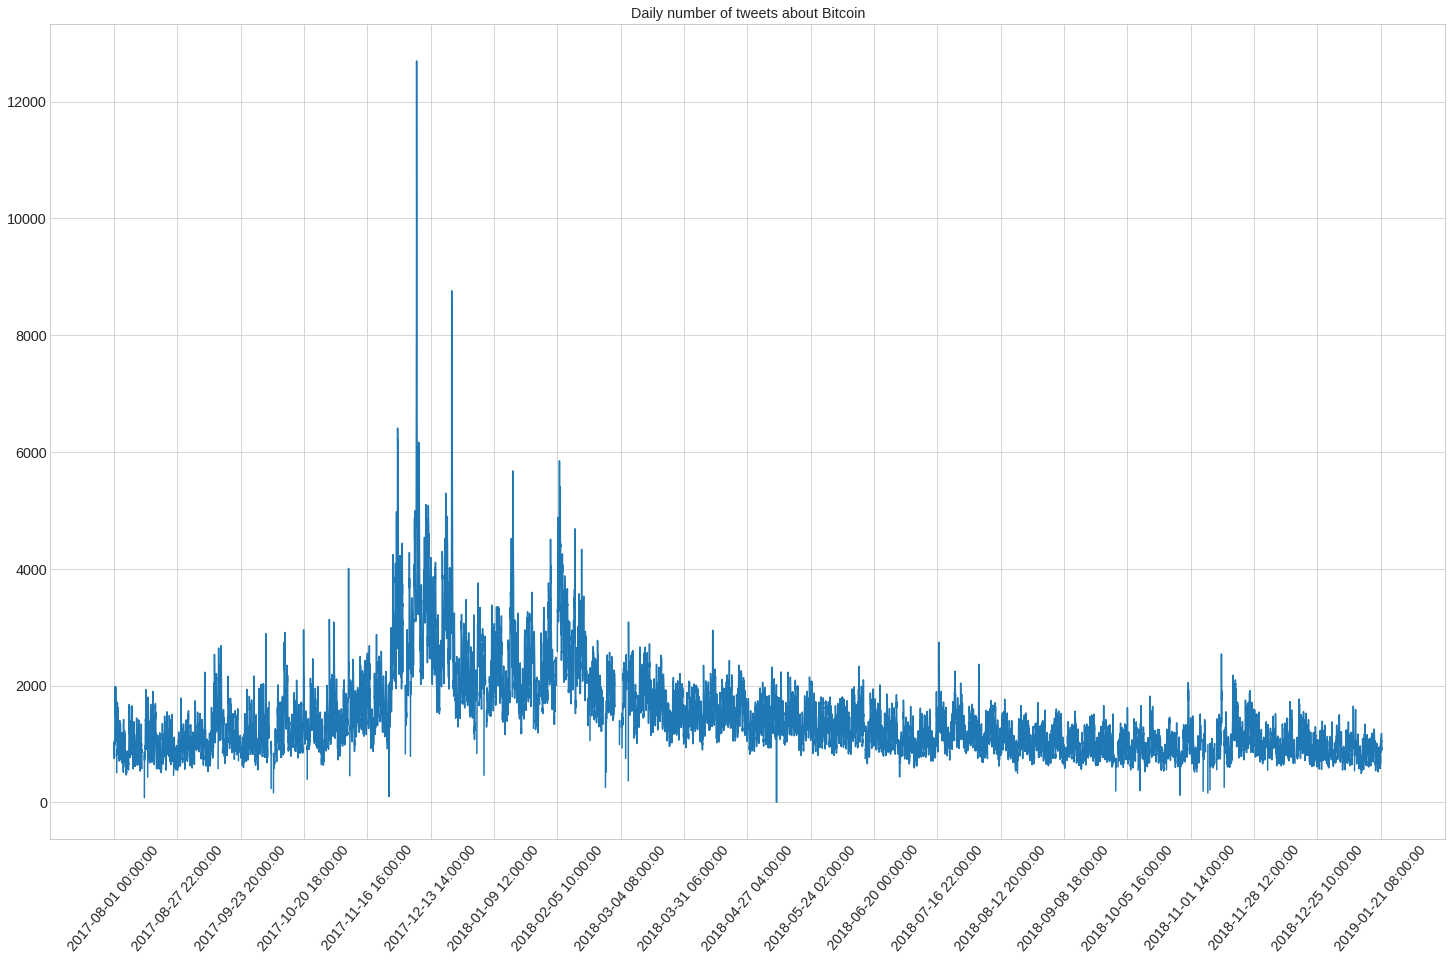

In [5]:
step = int(len(df.index) / 20)
plt.plot(df['Date'], df['Total Volume of Tweets'])
plt.title('Daily number of tweets about Bitcoin')
plt.xticks(df['Date'][0:-1:step], rotation=50)
plt.show()

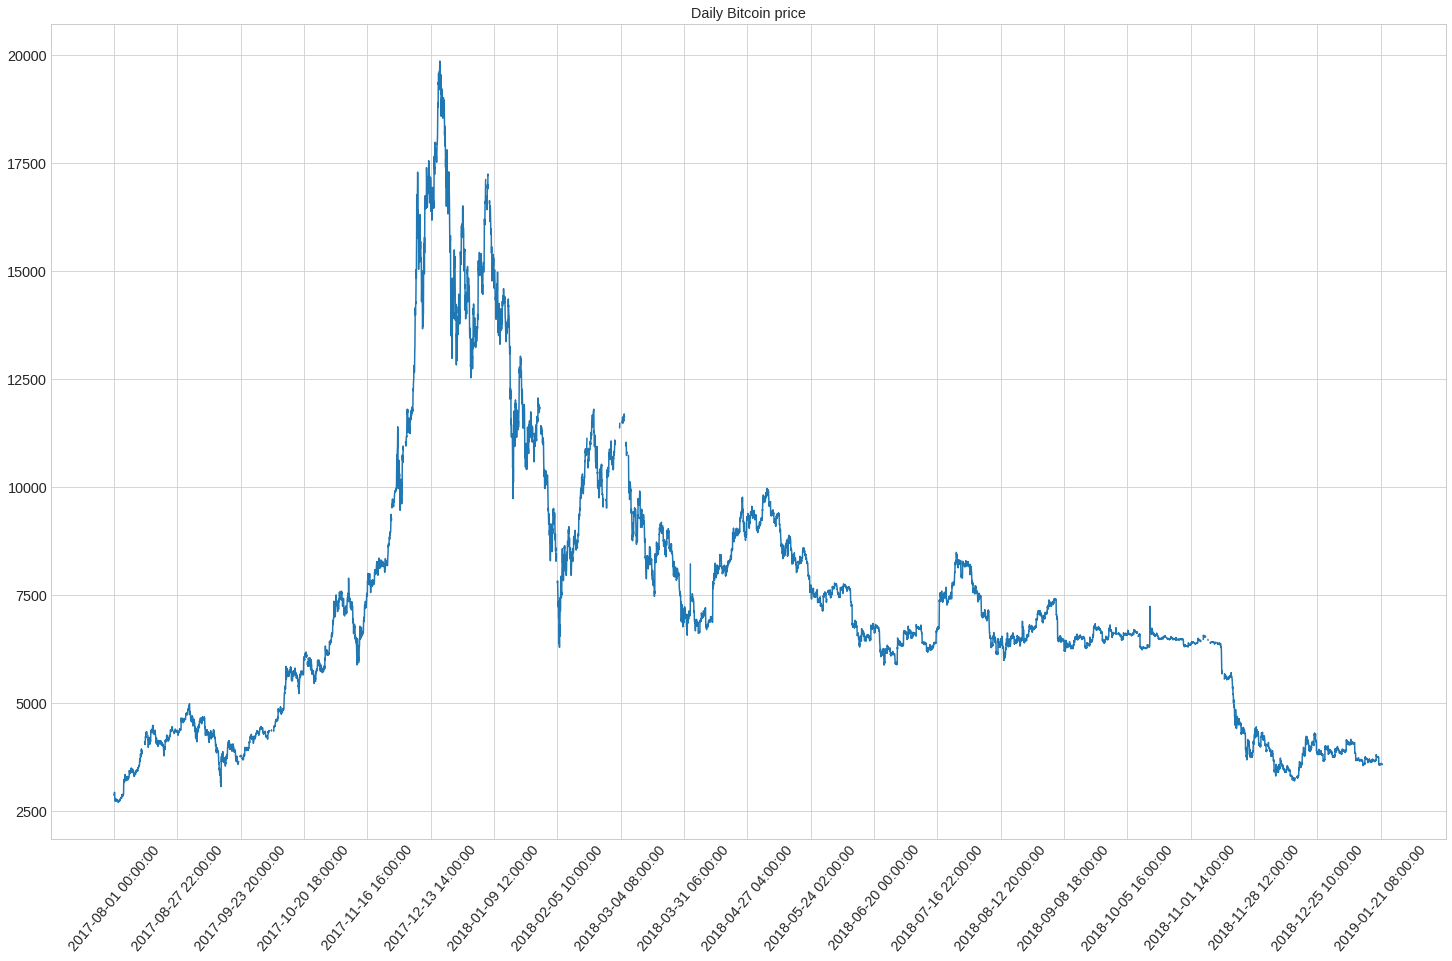

In [6]:
plt.plot(df['Date'], df['High'])
plt.title('Daily Bitcoin price')
plt.xticks(df['Date'][0:-1:step], rotation=50)
plt.show()

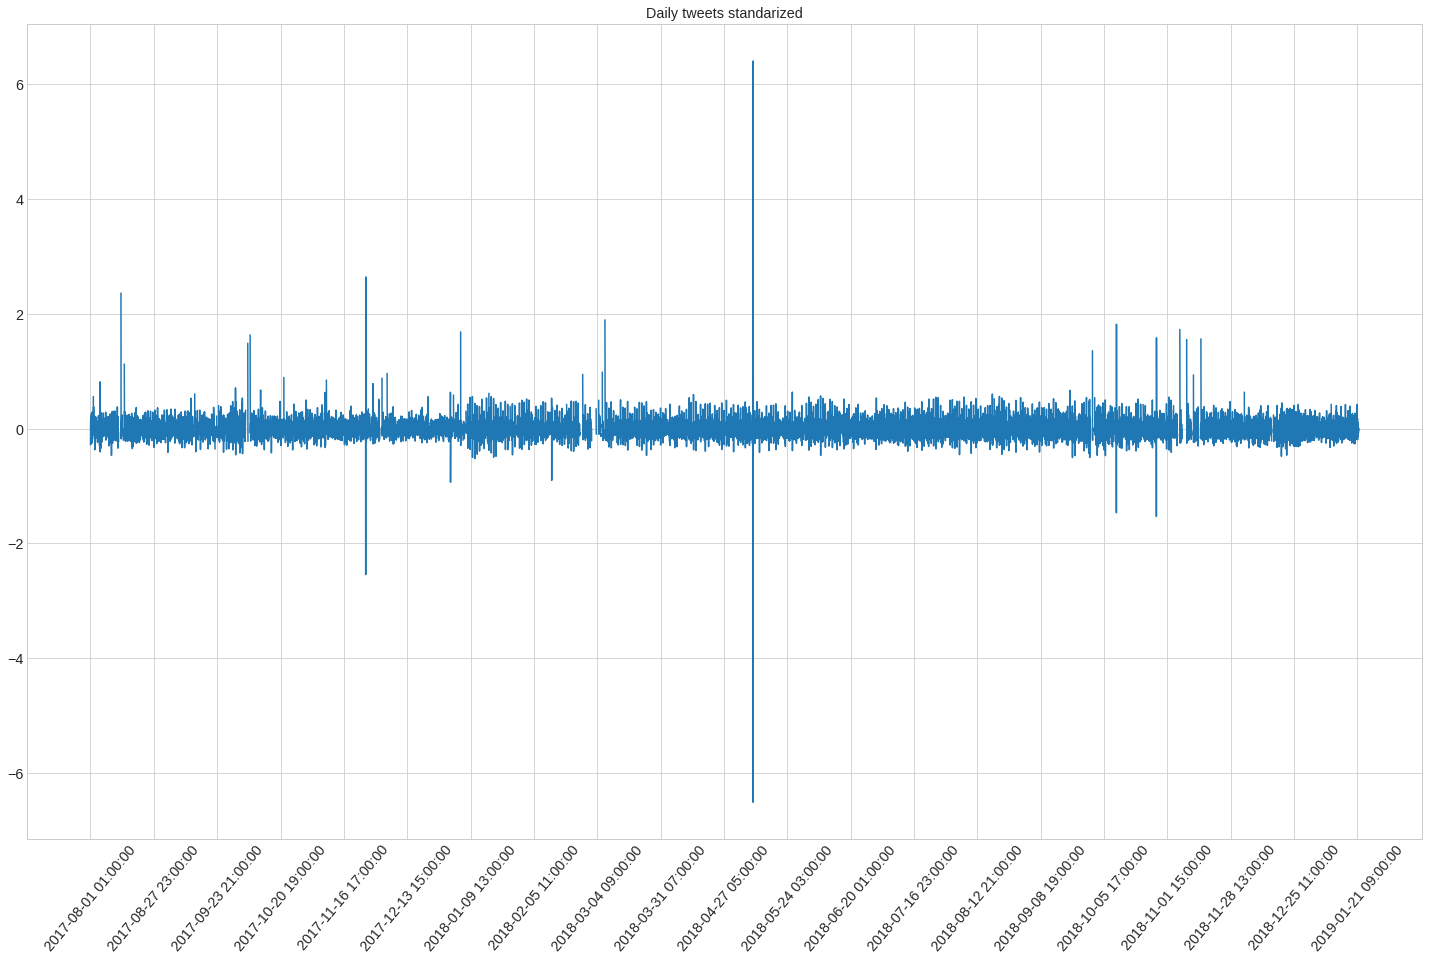

In [7]:
tweets_log_diff = np.log(df['Total Volume of Tweets']).diff()
plt.plot(df['Date'], tweets_log_diff)
plt.title('Daily tweets standarized')
plt.xticks(df['Date'][1:-1:step], rotation=50)
plt.show()

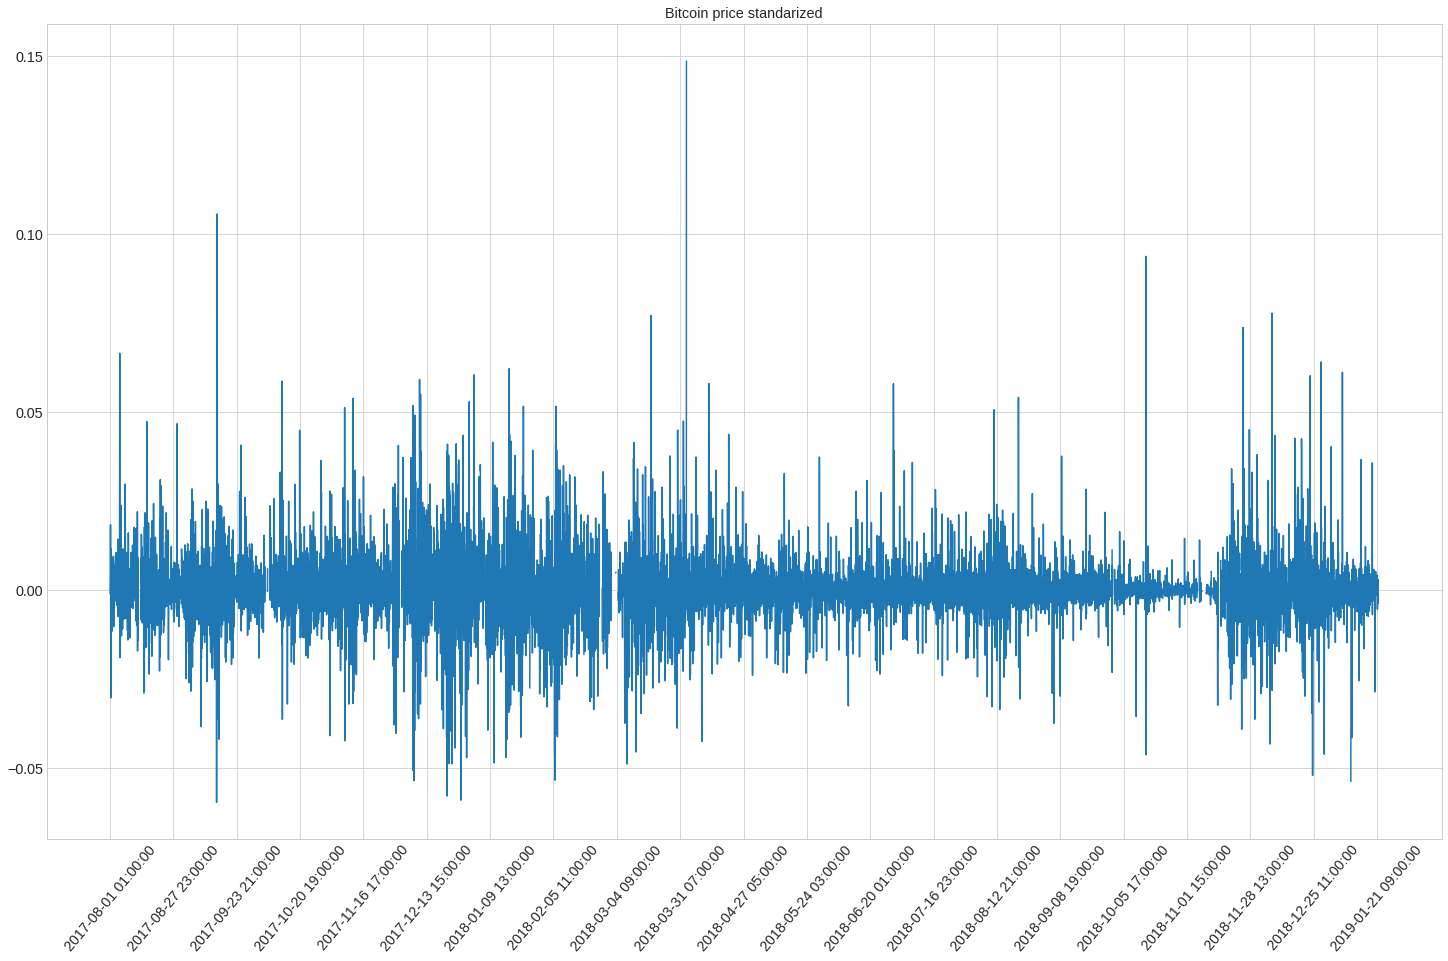

In [8]:
price_log_diff = np.log(df['High']).diff()
plt.plot(df['Date'], price_log_diff)
plt.title('Bitcoin price standarized')
plt.xticks(df['Date'][1:-1:step], rotation=50)
plt.show()

### 4. Detect Outliers

In [9]:
# function for detecting outliers, it returns indexes
def detect_outlier(data_1):
    outliers = []
    threshold = 3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for idx, val in enumerate(data_1):
        z_score = (val - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(idx)
    return outliers

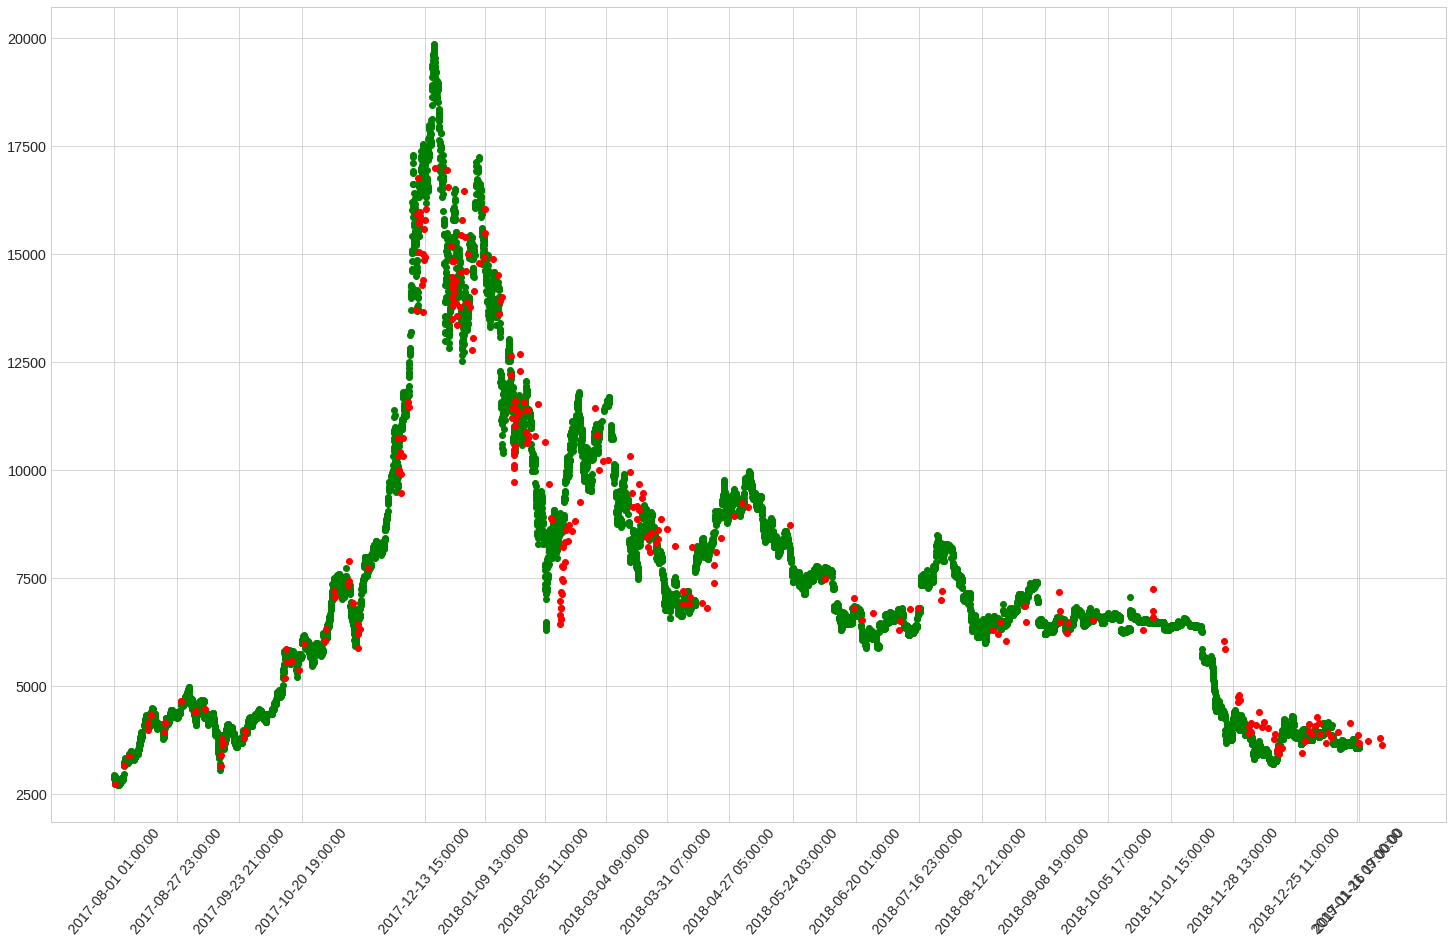

In [10]:
dates = df['Date'].copy()
prices = df['High'].copy()
price_log_diff = np.log(df['High']).diff() # Y n = Y n - Y n-1

daily_prices_outliers_indexes = detect_outlier(price_log_diff)

for i in sorted(daily_prices_outliers_indexes, reverse=True):
    del dates[i]
    del prices[i]
plt.scatter(dates, prices, color='green', )
plt.scatter(daily_prices_outliers_indexes, [df['High'][i] for i in daily_prices_outliers_indexes], color='red')
plt.xticks(df['Date'][1:-1:step], rotation=50)
plt.show()

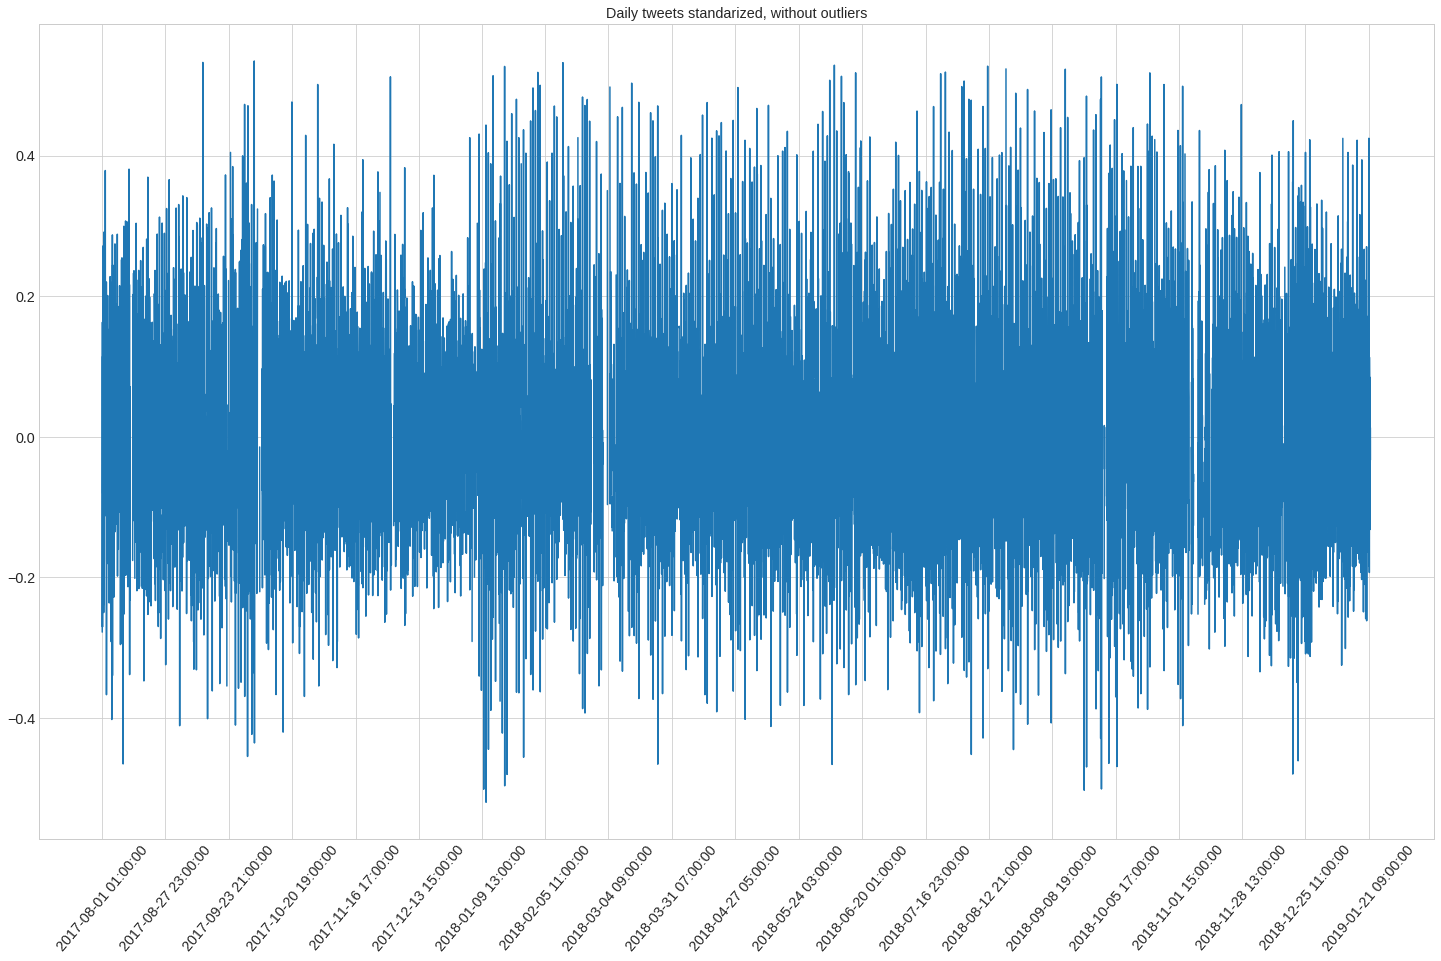

In [11]:
tweets_log_diff = np.log(df['Total Volume of Tweets']).diff() # Y n = Y n - Y n-1
outliers = detect_outlier(tweets_log_diff)

diff_df = df['Date'].copy()
for i in sorted(outliers, reverse=True):
    del diff_df[i]
    del tweets_log_diff[i]

plt.plot(diff_df, tweets_log_diff)
plt.title('Daily tweets standarized, without outliers')
plt.xticks(df['Date'][1:-1:step], rotation=50)
plt.show()

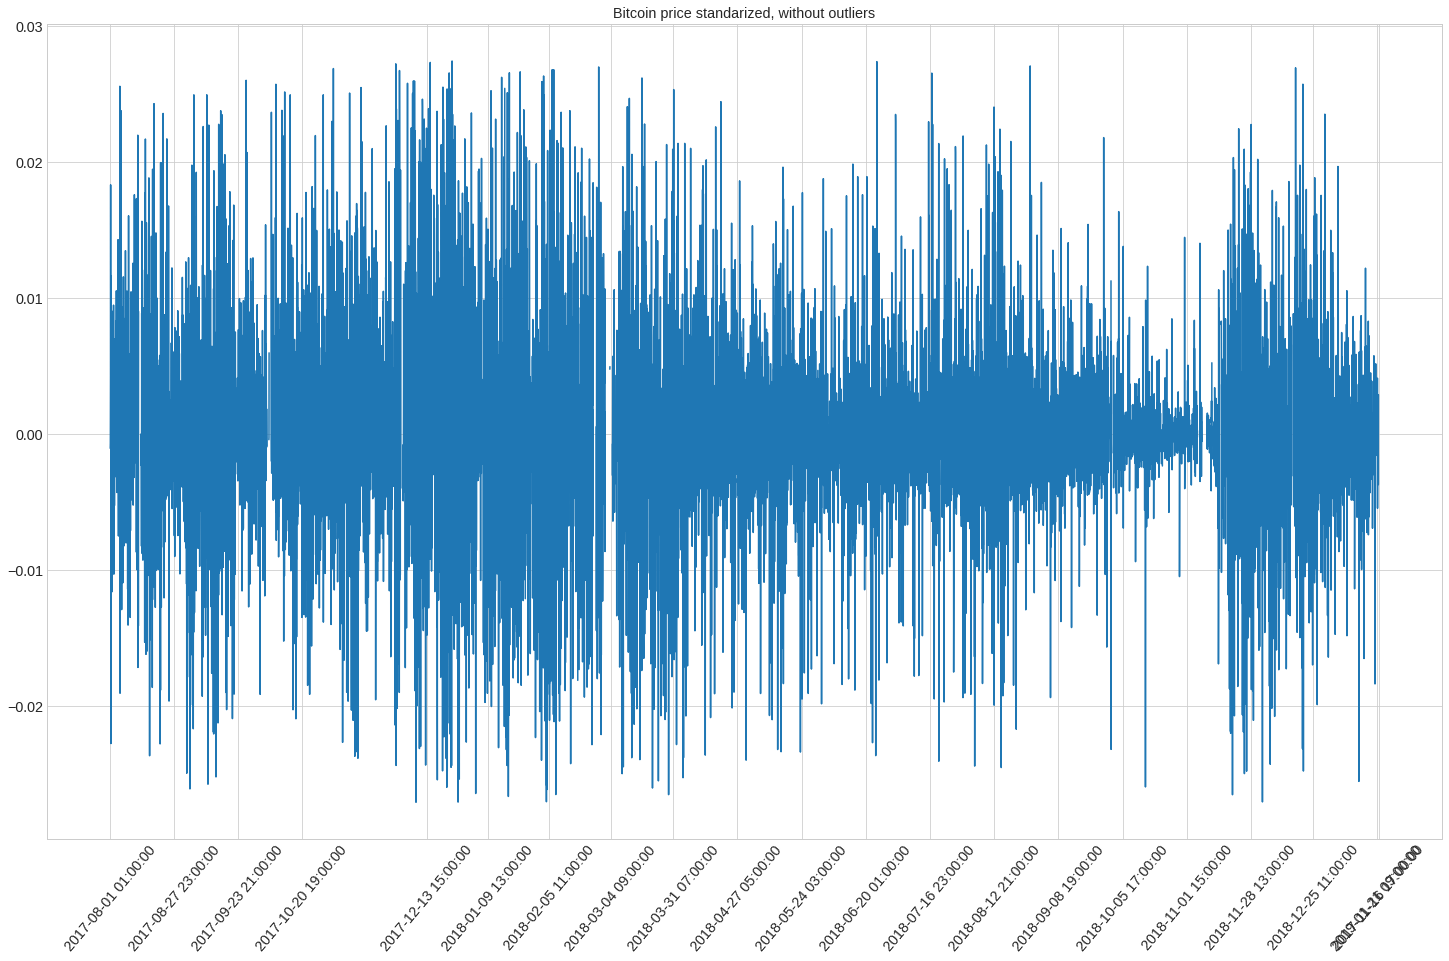

In [12]:
price_log_diff = np.log(df['High']).diff()
outliers = detect_outlier(price_log_diff)

diff_df = df['Date'].copy()
for i in sorted(outliers, reverse=True):
    del diff_df[i]
    del price_log_diff[i]

plt.plot(diff_df, price_log_diff)
plt.title('Bitcoin price standarized, without outliers')
plt.xticks(df['Date'][1:-1:step], rotation=50)
plt.show()

### 5. Collect statistics - mean, variation, min, max

In [13]:
def find_nan(data):
    nan_indexes = [];
    for i, v in enumerate(data):
        if np.isnan(v):
            nan_indexes.append(i)
    return nan_indexes

def get_statistics(data: pd.Series, column: string, title: string):
    new_data = data[column]
    nans = find_nan(new_data)
    if len(nans) > 0:
        print('Warning! found {} nan values in data series'.format(len(nans)))
    print('{}:'.format(title))
    print('Column name: {}'.format(column))
    print('Min: {}'.format(min(new_data)))
    print('Max: {}'.format(max(new_data)))
    print('Mean: {0:.2f}'.format(np.mean(new_data)))
    print('Median: {0:.2f}'.format(np.nanmedian(new_data)))
    print('Variance: {0:.2f}'.format(np.var(new_data)))
    print('Standard deviation: {0:.2f}\n'.format(np.std(new_data)))

In [14]:
get_statistics(df, 'High', 'Statistics for daily highest market prices')
get_statistics(df, 'Total Volume of Tweets', 'Statistics for daily number of tweets')

Warning! found 578 nan values in data series
Statistics for daily highest market prices:
Column name: High
Min: 2697.3
Max: 19870.62
Mean: 7319.29
Median: 6639.48
Variance: 9791694.59
Standard deviation: 3129.17

Warning! found 578 nan values in data series
Statistics for daily number of tweets:
Column name: Total Volume of Tweets
Min: 3.0
Max: 12696.0
Mean: 1435.31
Median: 1239.00
Variance: 554726.55
Standard deviation: 744.80



### 6. Compute correlation coefficient

In [15]:
print(np.ma.corrcoef(np.ma.masked_invalid(df['High']), np.ma.masked_invalid(df['Total Volume of Tweets'])))

[[1.0 0.6459016598326017]
 [0.6459016598326017 1.0]]


### 7. Most valuable attributes

### 8. ?? 

### 9. Deal with nan values

#### a) show what is missing 

In [16]:
for column in df:
    try:
        print('Found {} nan values column "{}"'.format(len(find_nan(df[column])), column))
    except TypeError:
        continue

Found 578 nan values column "Compound_Score"
Found 578 nan values column "Total Volume of Tweets"
Found 578 nan values column "Count_Negatives"
Found 578 nan values column "Count_Positives"
Found 578 nan values column "Count_Neutrals"
Found 578 nan values column "Sent_Negatives"
Found 579 nan values column "Sent_Positives"
Found 578 nan values column "Count_News"
Found 578 nan values column "Count_Bots"
Found 578 nan values column "Open"
Found 578 nan values column "High"
Found 578 nan values column "Low"
Found 578 nan values column "Close"


#### b) delete missing records

In [17]:
nan_indexes = find_nan(df['High'])
new_df = df.drop(nan_indexes)
get_statistics(new_df, 'High', 'Statistics for daily highest market prices')

Statistics for daily highest market prices:
Column name: High
Min: 2697.3
Max: 19870.62
Mean: 7319.29
Median: 6639.48
Variance: 9791694.59
Standard deviation: 3129.17



#### c) replace missing values with constant (zero)

In [18]:
new_df = df.fillna(0) # alternatively use df.replace(np.nan, constant)
get_statistics(new_df, 'High', 'Statistics for daily highest market prices')

Statistics for daily highest market prices:
Column name: High
Min: 0.0
Max: 19870.62
Mean: 6992.26
Median: 6585.74
Variance: 11640914.54
Standard deviation: 3411.88



#### d) fill nan with mean

In [19]:
mean_tweets = np.mean(df['Total Volume of Tweets'])
print('Mean: {}'.format(mean_tweets))
new_df = df.replace(np.nan, mean_tweets)
get_statistics(new_df, 'Total Volume of Tweets', 'Statistics for daily number of tweets')

Mean: 1435.3066030101959
Statistics for daily number of tweets:
Column name: Total Volume of Tweets
Min: 3.0
Max: 12696.0
Mean: 1435.31
Median: 1272.00
Variance: 529940.53
Standard deviation: 727.97



### 10.

#### a) Normalization [-1, 1]

In [20]:
def plot_scaled_column(data_x: pd.Series, data_y: pd.Series, plot_title):
    scaler = MinMaxScaler()
    normalized_df = scaler.fit_transform(data_y.values.reshape(-1, 1))
    step = int(len(normalized_df) / 20)
    plt.plot(data_x, normalized_df)
    plt.title(plot_title)
    plt.xticks(data_x[0:-1:step], rotation=50)
    plt.show()

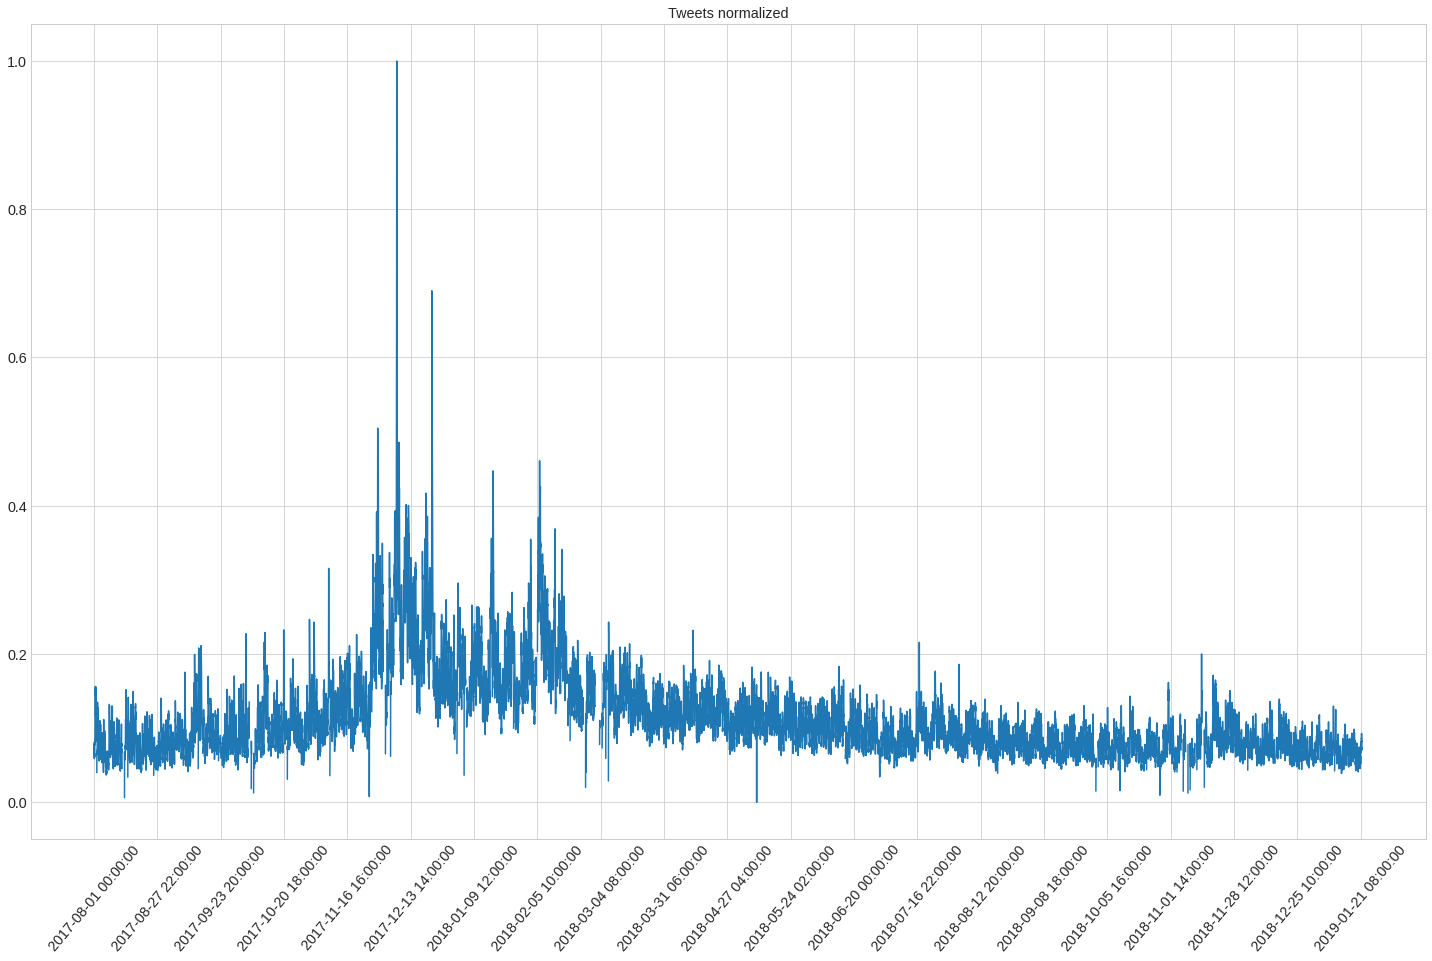

In [21]:
plot_scaled_column(df['Date'], df['Total Volume of Tweets'], 'Tweets normalized')

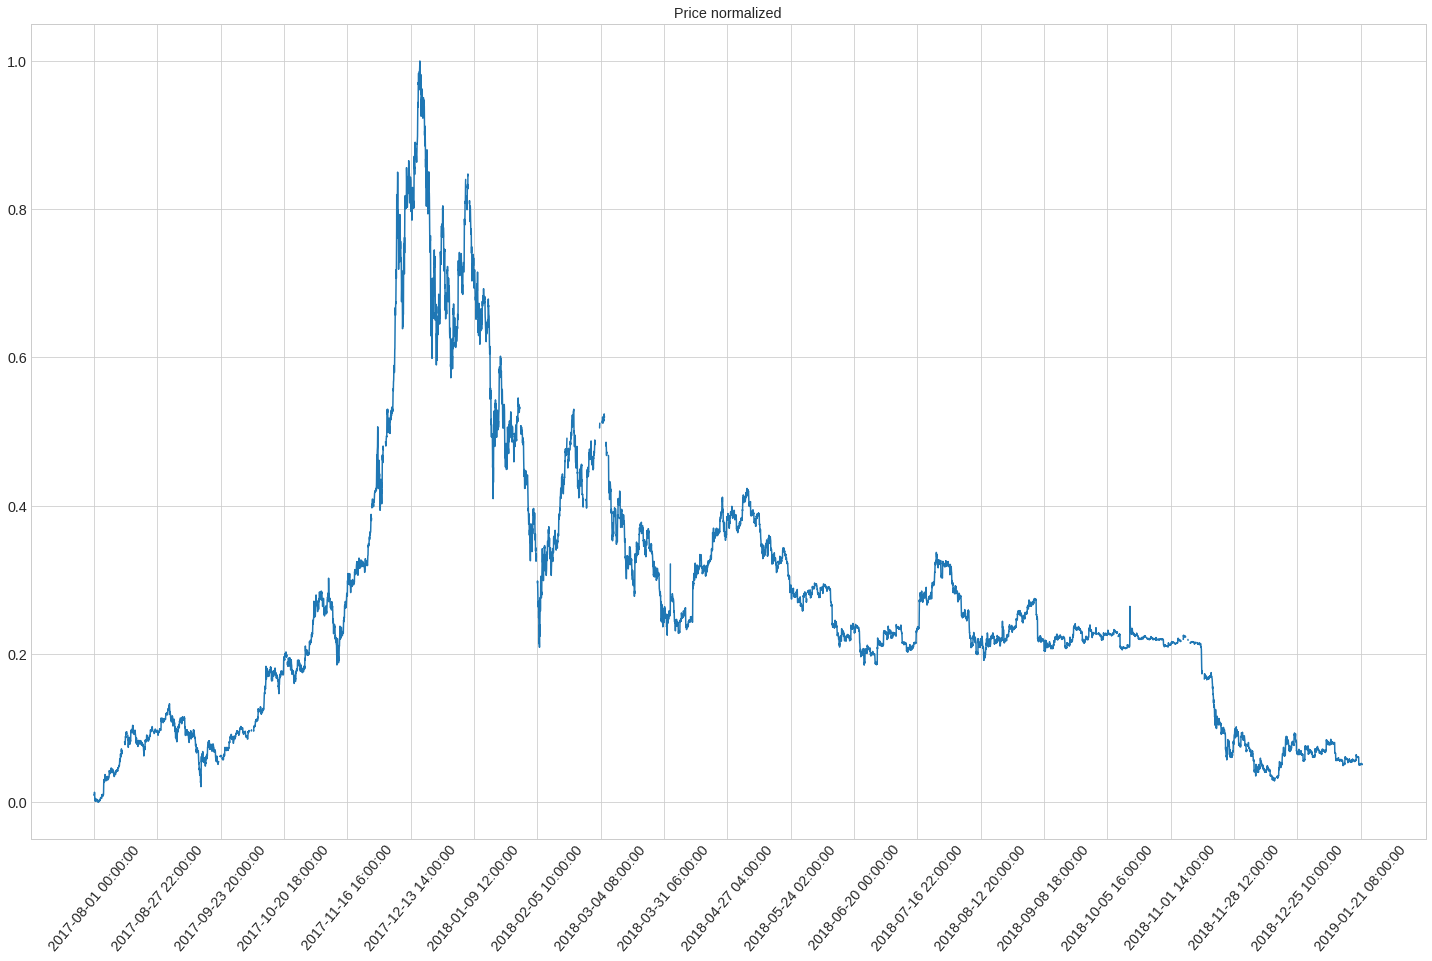

In [22]:
plot_scaled_column(df['Date'], df['High'], 'Price normalized')

#### b) Gauss distribution (0, 1)

<AxesSubplot:ylabel='Density'>

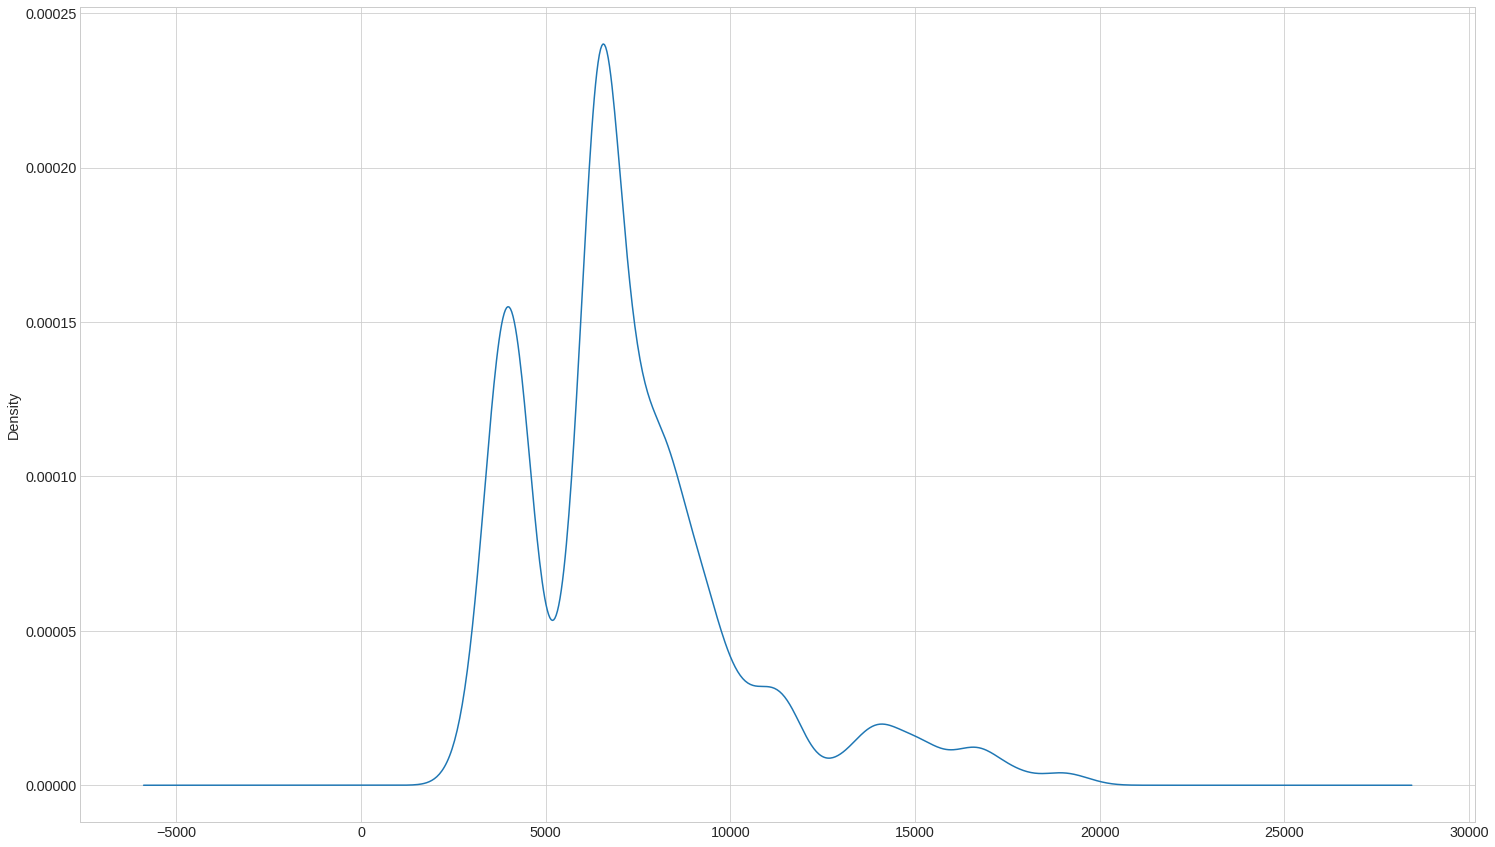

In [23]:
df['High'].plot.kde()